# Running analysis - Predictive modelling and analysis on alternative source data. 
### Runner - Student 215078188


## EDA running data 


This notebook explores personal captured runnning data from a different source than previous project 3 models.

In [1]:
# Packages
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from datetime import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [2]:
# Analysis of new data

Athlete2 = pd.read_csv(r'activities.csv')
#pd.read_csv(r'C:\Users\kgriffin\Desktop\Uni\Capstone\Activities_Ath_215078188.csv')

# Check the intitial columns from the athlete.
Athlete2.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Media
0,3368936569,"28 Apr 2020, 21:20:49",Morning Run,Run,NaN,908,3.09,180.0,37.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3368947731,"31 Mar 2020, 22:17:03",Morning Run,Run,NaN,723,2.52,197.0,49.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3368947765,"2 Apr 2020, 22:39:00",Morning Run,Run,NaN,909,3.02,200.0,62.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3368947813,"6 Apr 2020, 20:57:24",Morning Run,Run,NaN,908,3.01,189.0,45.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3368947853,"8 Apr 2020, 21:16:11",Morning Run,Run,NaN,957,3.14,187.0,54.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data clean-up

In [3]:
# This data us mostly comprised of running data and the activitiy we want to focus on. 
# The data also contains a lot of unnecessary columns for our analysis which we can remove, as well as some outliers likely to skew the data.

clean_ath = Athlete2[Athlete2['Activity Type'] == 'Run']


In [4]:
pd.set_option('display.max_columns', None)
clean_ath

# Inspect the cleaned data

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Media
0,3368936569,"28 Apr 2020, 21:20:49",Morning Run,Run,NaN,908,3.09,180.0,37.0,False,NaN,NaN,activities/3599939784.fit.gz,0.0,NaN,908.0,903.0,3089.500000,4.500000,3.421373,23.600986,23.400999,7.4,17.100000,15.500000,0.006474,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,264.000000,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3161.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3368947731,"31 Mar 2020, 22:17:03",Morning Run,Run,NaN,723,2.52,197.0,49.0,False,NaN,NaN,activities/3599951558.fit.gz,0.0,NaN,723.0,720.0,2521.399902,4.600000,3.501945,20.779991,20.879999,7.4,16.700001,19.299999,-0.003966,NaN,NaN,NaN,NaN,197.0,NaN,NaN,NaN,219.000000,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,2585.600098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3368947765,"2 Apr 2020, 22:39:00",Morning Run,Run,NaN,909,3.02,200.0,62.0,False,NaN,NaN,activities/3599951595.fit.gz,0.0,NaN,909.0,906.0,3022.899902,4.200000,3.336534,22.168888,23.568899,6.6,16.500000,13.600000,-0.046313,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,260.000000,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3094.399902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3368947813,"6 Apr 2020, 20:57:24",Morning Run,Run,NaN,908,3.01,189.0,45.0,False,NaN,NaN,activities/3599951648.fit.gz,0.0,NaN,908.0,903.0,3010.600098,4.500000,3.333998,23.579834,24.779800,7.4,17.100000,18.100000,-0.039859,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,259.000000,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3087.699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3368947853,"8 Apr 2020, 21:16:11",Morning Run,Run,NaN,957,3.14,187.0,54.0,False,NaN,NaN,activities/3599951676.fit.gz,0.0,NaN,957.0,952.0,3139.800049,4.700000,3.298109,23.010458,24.210501,7.2,16.900000,16.200001,-0.038219,NaN,NaN,NaN,NaN,187.0,NaN,NaN,NaN,269.000000,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3208.800049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
# List of column names to drop
columns_to_drop = ['Commute', 'Activity Gear', 'Activity Private Note', 'Bike Weight','Max Cadence', 'Average Cadence', 'Max Temperature','Average Temperature', 'Start Time', 'Weighted Average Power','Power Count', 'Prefer Perceived Exertion','Perceived Relative Effort', 'Commute.1', 'Total Weight Lifted', 'From Upload', 'Filename', 'Bike Weight', 'Perceived Exertion',
                    'Grade Adjusted Distance','Average Elapsed Speed', 'Dirt Distance', 'Total Steps', 'Weather Observation Time', 'Weather Condition', 'Weather Temperature', 'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure', 'Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity', 'Sunrise Time', 'Sunset Time', 'Moon Phase', 'Bike', 'Gear', 'Precipitation Probability', 'Precipitation Type', 'Cloud Cover', 'Weather Visibility', 'UV Index', 'Weather Ozone', 'Jump Count', 'Total Grit', 'Average Flow', 'Flagged']
# Replace with actual column names

# Drop unwanted columns
chop_ath = clean_ath.drop(columns=columns_to_drop)

# Display the cleaned dataset
print(chop_ath.head())

   Activity ID          Activity Date Activity Name Activity Type  \
0   3368936569  28 Apr 2020, 21:20:49   Morning Run           Run   
1   3368947731  31 Mar 2020, 22:17:03   Morning Run           Run   
2   3368947765   2 Apr 2020, 22:39:00   Morning Run           Run   
3   3368947813   6 Apr 2020, 20:57:24   Morning Run           Run   
4   3368947853   8 Apr 2020, 21:16:11   Morning Run           Run   

  Activity Description  Elapsed Time  Distance  Max Heart Rate  \
0                  NaN           908      3.09           180.0   
1                  NaN           723      2.52           197.0   
2                  NaN           909      3.02           200.0   
3                  NaN           908      3.01           189.0   
4                  NaN           957      3.14           187.0   

   Relative Effort  Athlete Weight  Elapsed Time.1  Moving Time   Distance.1  \
0             37.0             0.0           908.0        903.0  3089.500000   
1             49.0          

In [6]:
# Calculate the proportion of missing values for each column
missing_values = chop_ath.isnull().mean()

# Set your threshold (e.g., 80% missing values)
threshold = 0.8

# Filter out columns with more than the specified threshold
columns_to_keep = missing_values[missing_values <= threshold].index

# Create a new DataFrame with only the selected columns
cleaned_data = chop_ath[columns_to_keep]

# Drop remaining columns with empties
cleaned_data.dropna(subset=['Max Heart Rate', 'Relative Effort', 'Elevation Loss','Average Heart Rate'], inplace=True)



In [7]:
# Print missing

missing_values = cleaned_data.isnull().sum()
print(missing_values)

Activity ID           0
Activity Date         0
Activity Name         0
Activity Type         0
Elapsed Time          0
Distance              0
Max Heart Rate        0
Relative Effort       0
Elapsed Time.1        0
Moving Time           0
Distance.1            0
Max Speed             0
Average Speed         0
Elevation Gain        0
Elevation Loss        0
Elevation Low         0
Elevation High        0
Max Grade             0
Average Grade         0
Average Heart Rate    0
Calories              0
Relative Effort.1     0
dtype: int64


In [8]:
# Check for duplicates
duplicates = cleaned_data[cleaned_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)


# Remove mistakes and outliers
# Removing clear outliers, being the runs that are in the slowest 5%

# First calculate pace in minutes per kilometer
cleaned_data['Pacefilt'] = (cleaned_data['Elapsed Time'] / 60) / cleaned_data['Distance']

# # Display the first few rows to verify the pace calculation
# cleaned_data[['Elapsed Time', 'Distance', 'Pacefilt']].head()


# Calculate the 95th percentile pace
pace_95th_percentile = cleaned_data['Pacefilt'].quantile(0.95)

# Filter out runs slower than the 95th percentile pace
model_data = cleaned_data[cleaned_data['Pacefilt'] <= pace_95th_percentile]

     

Duplicate Rows:
Empty DataFrame
Columns: [Activity ID, Activity Date, Activity Name, Activity Type, Elapsed Time, Distance, Max Heart Rate, Relative Effort, Elapsed Time.1, Moving Time, Distance.1, Max Speed, Average Speed, Elevation Gain, Elevation Loss, Elevation Low, Elevation High, Max Grade, Average Grade, Average Heart Rate, Calories, Relative Effort.1]
Index: []


In [9]:
# Quickly observe data
model_data

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Pacefilt
14,7744458559,"31 Aug 2022, 21:06:11",Morning Run,Run,1423,5.00,180.0,76.0,1423.0,1411.0,5006.600098,4.671973,3.548264,25.790417,25.190399,4.200000,17.000000,22.804703,0.011984,172.526688,450.000000,76.0,4.743333
15,7744458598,"27 Aug 2022, 23:38:21",Morning Run,Run,1469,5.04,181.0,68.0,1469.0,1462.0,5045.060059,4.719995,3.450794,25.432917,24.932899,4.200000,17.000000,20.072556,0.009911,168.576996,446.000000,68.0,4.857804
17,7744458624,"26 Aug 2022, 23:29:13",Morning Run,Run,1680,5.10,184.0,71.0,1680.0,1539.0,5100.989746,4.417969,3.314483,25.545834,24.545799,4.200000,17.000000,20.341351,0.019604,168.736420,465.000000,71.0,5.490196
20,7744458685,"19 Aug 2022, 22:16:43",Morning Run,Run,1644,5.25,187.0,76.0,1644.0,1636.0,5256.169922,5.140400,3.212818,82.308456,85.508499,254.300003,288.600006,15.806112,-0.060881,168.761765,500.000000,76.0,5.219048
21,7744458750,"17 Aug 2022, 20:33:27",Morning Run,Run,1565,5.23,178.0,61.0,1565.0,1555.0,5236.770020,4.943945,3.367698,28.491682,28.291700,2.600000,17.000000,25.823637,0.003819,165.401291,464.000000,61.0,4.987253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,11343369736,"6 May 2024, 07:11:39",Afternoon Run,Run,1890,6.66,160.0,45.0,1890.0,1881.0,6662.160156,5.832031,3.541818,15.248260,15.400769,6.200000,22.700001,24.154932,0.000000,147.433685,679.811768,45.0,4.729730
520,11348527549,"6 May 2024, 20:59:18",Morning Run,Run,3312,10.59,165.0,81.0,3312.0,3049.0,10595.610352,5.486914,3.475110,37.677719,37.276237,7.100000,17.799999,6.644542,0.000000,150.020691,1075.869385,81.0,5.212465
521,11356362044,"7 May 2024, 20:33:28",Morning Run,Run,3426,12.18,176.0,83.0,3426.0,3328.0,12179.139648,4.674024,3.659597,52.447109,51.973083,7.100000,16.700001,15.366867,0.001645,148.707458,1239.687134,83.0,4.688013
522,11364452479,"8 May 2024, 20:37:48",Morning Run,Run,4194,14.89,173.0,120.0,4194.0,4176.0,14895.419922,4.600000,3.566911,73.212273,73.450760,7.100000,27.299999,14.843568,0.000000,152.121033,1518.129639,120.0,4.694426


### Analysis


Perform Exploratory Data Analysis to gain a understanding of the data pre-modelling
 


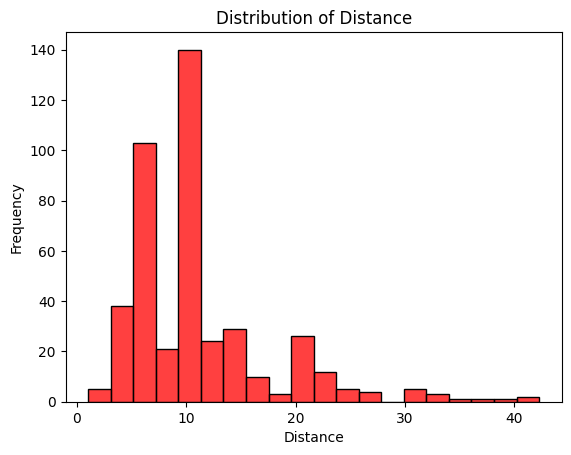

In [10]:

# Set the color palette (optional)
sns.set_palette("muted")

# Create the histogram using seaborn
sns.histplot(data=model_data, x='Distance', color='red', bins=20, kde=False)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')

# Show the plot
plt.show()

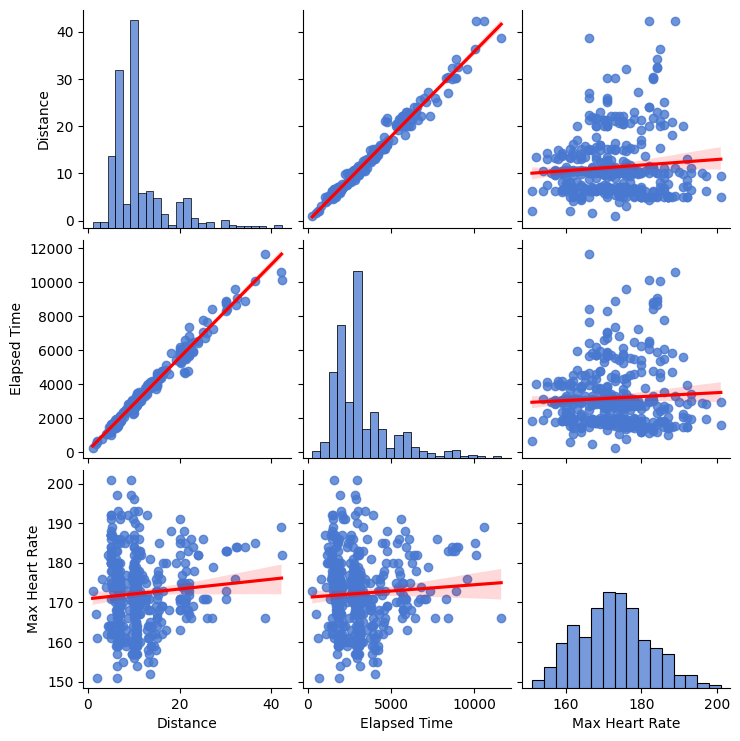

In [11]:
# Explore relationships of original EDA variables 

sns.pairplot(model_data[['Distance', 'Elapsed Time', 'Max Heart Rate']], kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.show()

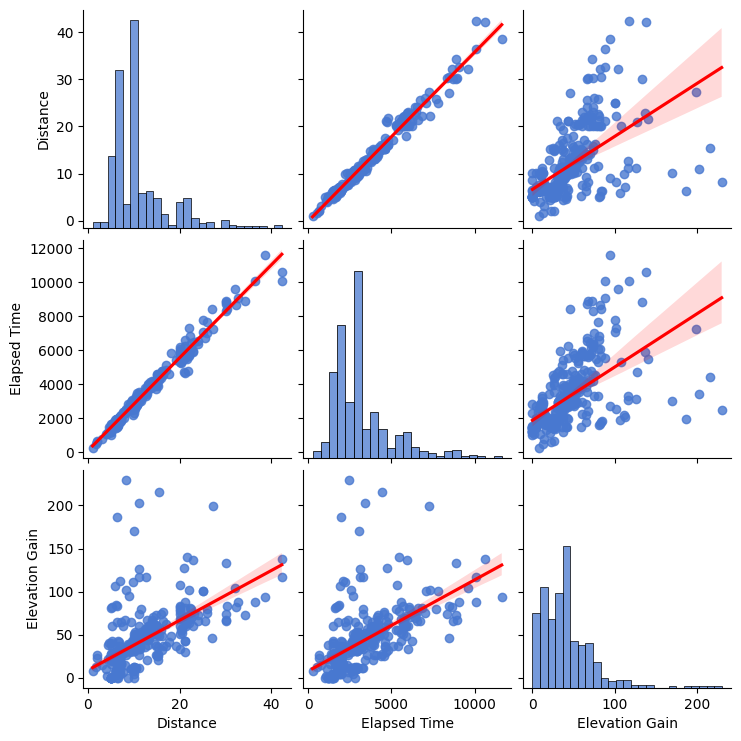

In [12]:
# Explore using target variables 

sns.pairplot(model_data[['Distance', 'Elapsed Time', 'Elevation Gain']], kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.show()

We notice a dominant right-skew to the data, there are significantly more runs recorded over shorter distances compared to the intermediate-longer and marathon length. There is a particular cluster of outliers for elevation gain and distance. You can see there are still some outliers for elapsed time also.

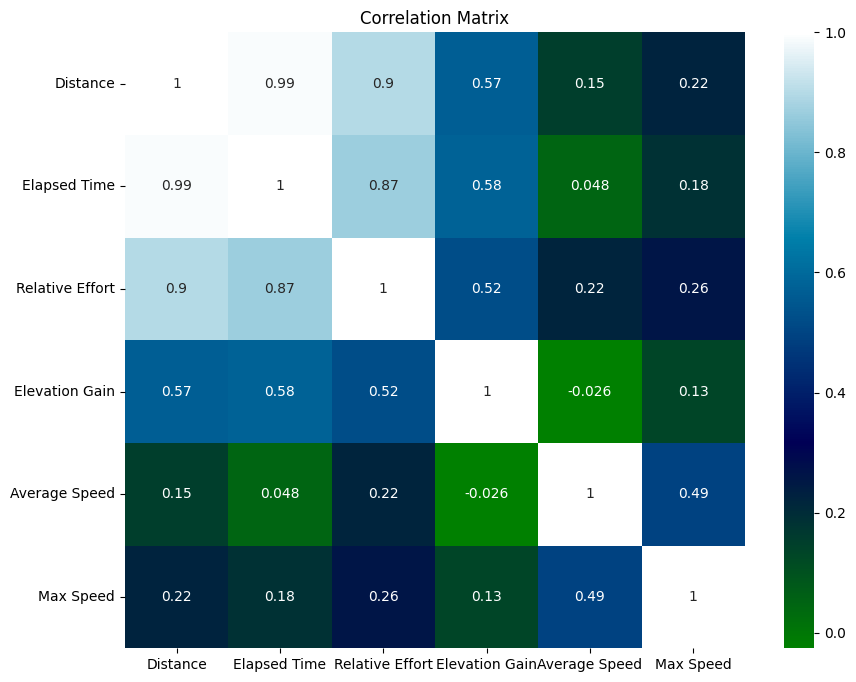

In [13]:
# Correlation Matrix 
correlation_matrix = model_data[['Distance', 'Elapsed Time' , 'Relative Effort', 'Elevation Gain', 'Average Speed', 'Max Speed', ]].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix , annot=True, cmap='ocean')
plt.show()

# EDA Results

The plot above presents some obvious correlations between distance and elapsed time, naturally the longer the run in distance the longer the time taken to complete. The same can be said for Effort, longer courses are harder.

The elevation gain seems to have a moderate correlation with elapsed time, which might come as a surprise, it's assumed working against gravity would impact the run timing negatively.

It is important to consider that the athlete has likely improved their running capacity by regular efforts, their increase in distance probably coincides with an increased aerobic capacity and a decrease in elapsed time over distances relative to when the first activities were recorded, this is evidenced by the lack of complete negative correlation of distance to variables such as max speed, average speed, elevation gain and Elapsed time. While effort maintains a strong correlation.

## Modelling

## Assigning pace curve columns

We will use a pace curve model function that is part of the redback code repository

In [14]:
# Pace curve function located at the following adress
'https://github.com/s222348917/redback-fit-sports-performance/blob/main/Running%20Analysis/pace_curve.py'
# Requires this .py in the same directory as the notebook

'https://github.com/s222348917/redback-fit-sports-performance/blob/main/Running%20Analysis/pace_curve.py'

Empty DataFrame
Columns: [Activity ID, Activity Date, Activity Name, Activity Type, Elapsed Time, Distance, Max Heart Rate, Relative Effort, Elapsed Time.1, Moving Time, Distance.1, Max Speed, Average Speed, Elevation Gain, Elevation Loss, Elevation Low, Elevation High, Max Grade, Average Grade, Average Heart Rate, Calories, Relative Effort.1, Pacefilt]
Index: []


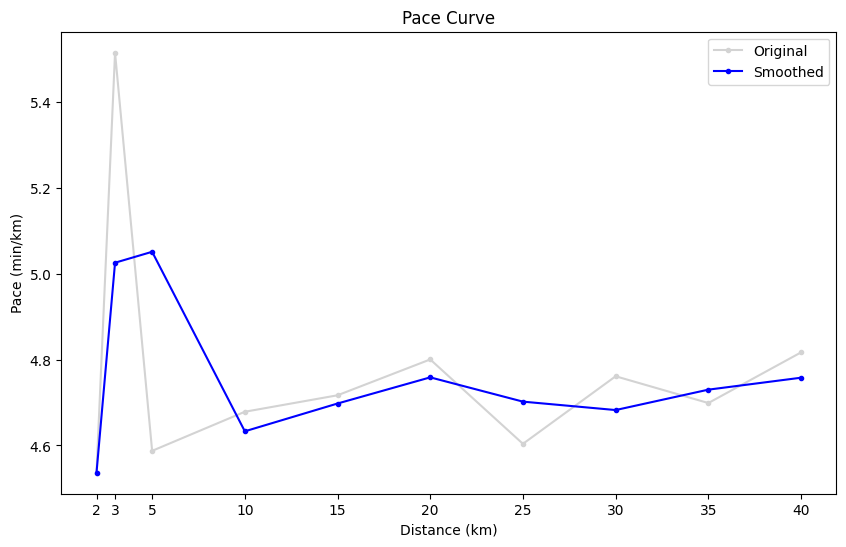

In [15]:
from pace_curve import PaceCurveAnalyzer

# Load student 215078188 data
data_source = model_data
# pd.read_csv('activities_.csv')

# Convert Activity Date to correct date time format
data_source['Activity Date'] = pd.to_datetime(data_source['Activity Date'], format='%d %b %Y, %H:%M:%S', errors='coerce')

# Check for any fails
print(data_source[data_source['Activity Date'].isna()])

# Pass the DataFrame to PaceCurveAnalyzer
analyzer = PaceCurveAnalyzer(data_source=data_source)

# Create the data for the pace curve
pace_curve = analyzer.create_pace_curve(activity_type="Run", date="2024-03-31", num_days=480)

# Visualise the pace curve
analyzer.plot_pace_curve(pace_curve)

# Add pace curve arrays to the data
modified_data = analyzer.add_pace_curve_column(activity_type="Run", num_days=480)

# Expand columns into the dataset 
expanded_df = analyzer.expand_pace_curve_to_columns()

The pace curve indicates the slowest portion of the runs are at the lowest distance. This is is typical of a runner starting from a low fitness baseline and building their aerobic capacity.
As indicated by our exploratory data analysis, the most common run length was 10 kilometers followed by distances between 10-20 kilometers. The pace curve may indicate here that the runner paces themselves accordingly to the length of the race and aims to 'negatively split' (run their slowest km's towards the end of their run to ensure all stamina is utilised) making the milestones in distance of 15-20k and 40k (marathon race length) the slowest pace curve.




In [16]:
# Peak into expanded columns
expanded_df
#.to_csv('activities_pacecurvcol.csv', index=False)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Heart Rate,Calories,Relative Effort.1,Pacefilt,Pace Curve,Pace 2.0 km,Pace 3.0 km,Pace 5.0 km,Pace 10.0 km,Pace 15.0 km,Pace 20.0 km,Pace 25.0 km,Pace 30.0 km,Pace 35.0 km,Pace 40.0 km
0,7744458559,2022-08-31 21:06:11,Morning Run,Run,1423,5.00,180.0,76.0,1423.0,1411.0,5006.600098,4.671973,3.548264,25.790417,25.190399,4.200000,17.000000,22.804703,0.011984,172.526688,450.000000,76.0,4.743333,"[[5.0, 4.896459585838343], [10.0, 4.9233218787...",NaN,NaN,4.896460,4.923322,NaN,NaN,NaN,NaN,NaN,NaN
1,7744458598,2022-08-27 23:38:21,Morning Run,Run,1469,5.04,181.0,68.0,1469.0,1462.0,5045.060059,4.719995,3.450794,25.432917,24.932899,4.200000,17.000000,20.072556,0.009911,168.576996,446.000000,68.0,4.857804,"[[5.0, 4.896459585838343], [10.0, 4.9371671515...",NaN,NaN,4.896460,4.937167,NaN,NaN,NaN,NaN,NaN,NaN
2,7744458624,2022-08-26 23:29:13,Morning Run,Run,1680,5.10,184.0,71.0,1680.0,1539.0,5100.989746,4.417969,3.314483,25.545834,24.545799,4.200000,17.000000,20.341351,0.019604,168.736420,465.000000,71.0,5.490196,"[[5.0, 4.896459585838343], [10.0, 4.9437807280...",NaN,NaN,4.896460,4.943781,NaN,NaN,NaN,NaN,NaN,NaN
3,7744458685,2022-08-19 22:16:43,Morning Run,Run,1644,5.25,187.0,76.0,1644.0,1636.0,5256.169922,5.140400,3.212818,82.308456,85.508499,254.300003,288.600006,15.806112,-0.060881,168.761765,500.000000,76.0,5.219048,"[[5.0, 4.896459585838343], [10.0, 4.8941066052...",NaN,NaN,4.896460,4.894107,NaN,NaN,NaN,NaN,NaN,NaN
4,7744458750,2022-08-17 20:33:27,Morning Run,Run,1565,5.23,178.0,61.0,1565.0,1555.0,5236.770020,4.943945,3.367698,28.491682,28.291700,2.600000,17.000000,25.823637,0.003819,165.401291,464.000000,61.0,4.987253,"[[5.0, 4.896459585838343], [10.0, 4.8616125039...",NaN,NaN,4.896460,4.861613,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11343369736,2024-05-06 07:11:39,Afternoon Run,Run,1890,6.66,160.0,45.0,1890.0,1881.0,6662.160156,5.832031,3.541818,15.248260,15.400769,6.200000,22.700001,24.154932,0.000000,147.433685,679.811768,45.0,4.729730,"[[2.0, 4.536489151873767], [3.0, 5.33167495854...",4.536489,5.331675,4.587395,4.677167,4.716756,4.790276,4.555652,4.760993,4.698694,4.816604
429,11348527549,2024-05-06 20:59:18,Morning Run,Run,3312,10.59,165.0,81.0,3312.0,3049.0,10595.610352,5.486914,3.475110,37.677719,37.276237,7.100000,17.799999,6.644542,0.000000,150.020691,1075.869385,81.0,5.212465,"[[2.0, 4.536489151873767], [3.0, 5.33167495854...",4.536489,5.331675,4.587395,4.678124,4.719914,4.790276,4.555652,4.760993,4.698694,4.816604
430,11356362044,2024-05-07 20:33:28,Morning Run,Run,3426,12.18,176.0,83.0,3426.0,3328.0,12179.139648,4.674024,3.659597,52.447109,51.973083,7.100000,16.700001,15.366867,0.001645,148.707458,1239.687134,83.0,4.688013,"[[2.0, 4.536489151873767], [3.0, 5.33167495854...",4.536489,5.331675,4.587395,4.678124,4.719712,4.790276,4.555652,4.760993,4.698694,4.816604
431,11364452479,2024-05-08 20:37:48,Morning Run,Run,4194,14.89,173.0,120.0,4194.0,4176.0,14895.419922,4.600000,3.566911,73.212273,73.450760,7.100000,27.299999,14.843568,0.000000,152.121033,1518.129639,120.0,4.694426,"[[2.0, 4.536489151873767], [3.0, 5.33167495854...",4.536489,5.331675,4.587395,4.678124,4.719553,4.790276,4.555652,4.760993,4.698694,4.816604


The rolling average pace columns have been added to the Running dataset.
The data can now be ultilised by predictive modelling


In [17]:
# Final Clean-up of data leaving only a dataframe with variables for modelling

df_run_clean = expanded_df[[
    'Distance', 'Elapsed Time', 'Elevation Gain',
    'Pace 2.0 km', 'Pace 3.0 km', 'Pace 5.0 km', 'Pace 10.0 km',
    'Pace 15.0 km', 'Pace 20.0 km', 'Pace 25.0 km', 'Pace 30.0 km',
    'Pace 35.0 km', 'Pace 40.0 km'
]]

df_run_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        433 non-null    float64
 1   Elapsed Time    433 non-null    int64  
 2   Elevation Gain  433 non-null    float64
 3   Pace 2.0 km     266 non-null    float64
 4   Pace 3.0 km     64 non-null     float64
 5   Pace 5.0 km     427 non-null    float64
 6   Pace 10.0 km    433 non-null    float64
 7   Pace 15.0 km    418 non-null    float64
 8   Pace 20.0 km    386 non-null    float64
 9   Pace 25.0 km    371 non-null    float64
 10  Pace 30.0 km    349 non-null    float64
 11  Pace 35.0 km    320 non-null    float64
 12  Pace 40.0 km    210 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 44.1 KB


In [18]:
# Instead of imputation we will replace with 0's to match comparitive models in the company.

df_run_clean = df_run_clean.fillna(0)

# A quick look at the leading columns, We are aware some of the pace curve columns will have some 0 values.
df_run_clean.head()


,Distance,Elapsed Time,Elevation Gain,Pace 2.0 km,Pace 3.0 km,Pace 5.0 km,Pace 10.0 km,Pace 15.0 km,Pace 20.0 km,Pace 25.0 km,Pace 30.0 km,Pace 35.0 km,Pace 40.0 km
0,5.00,1423,25.790417,0.0,0.0,4.89646,4.923322,0.0,0.0,0.0,0.0,0.0,0.0
1,5.04,1469,25.432917,0.0,0.0,4.89646,4.937167,0.0,0.0,0.0,0.0,0.0,0.0
2,5.10,1680,25.545834,0.0,0.0,4.89646,4.943781,0.0,0.0,0.0,0.0,0.0,0.0
3,5.25,1644,82.308456,0.0,0.0,4.89646,4.894107,0.0,0.0,0.0,0.0,0.0,0.0
4,5.23,1565,28.491682,0.0,0.0,4.89646,4.861613,0.0,0.0,0.0,0.0,0.0,0.0


Given the success of previous models, we will use linear regression, ridge regression and random forest models to yield RM2E scores to determine accuracy

In [20]:

# Load the dataset
data_path = df_run_clean
data = data_path

# Define the features and target variable
features = [
    'Distance', 'Elevation Gain', 'Pace 5.0 km',
    'Pace 10.0 km', 'Pace 15.0 km', 'Pace 20.0 km', 'Pace 25.0 km', 
    'Pace 30.0 km', 'Pace 35.0 km', 'Pace 40.0 km'
]
X = data[features]
y = data['Elapsed Time']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Ridge Regression model
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

random_forest = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Print the results
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression Alpha: {ridge.alpha_}")
print("Random Forest Best Parameters:", best_params)
print("Random Forest Best RMSE:", best_score)


Linear Regression RMSE: 258.7622560676361
Ridge Regression RMSE: 259.81143778386553
Ridge Regression Alpha: 10.0
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best RMSE: 252.8234367650132


## Results
All models perform well compared to previous modelling on different source data and variables.
- Ridge regression with an alpha or adjustment metric of 10.0 (reltively high) improved from standard linear regression.
- The end scores between the three models were close in performance. Subsequent tuning or a different random state may see standard linear regression or ridge regression outpreform the Random Forest model, which has the highest performance for this experiment. Tuning setting retrieved as the most accurate were a max depth of 10, minumum samples (leaf) = 2, minumum sample split of 2, and 200 estimators.

- The Random Forest model has the best performance with an RMSE of 252.8234 equivalent to estimating duration of a run to within approx. 4 minutes, 23 seconds

- This model borrows the same feature selection of a similar Project 3 model and the results are comparable.